# Aprendizaje Automático en Grafos

### - LECTURA DE FICHEROS

In [17]:
import pandas
import numpy
#Usamos el método read_csv para leer  ENGB_target.csv, y para ello necesitamos pandas.
twitch_users = pandas.read_csv('ENGB_target.csv', skiprows=1 , header=None,
                       names=['id2', 'days', 'mature', 'views',
                              'partner', 'id'], 
                        usecols = ['id', 'days', 'mature', 'views',
                              'partner'] )


In [18]:
cols = ['id',  'mature','days', 'views','partner']
twitch_users [['partner']] *= 1 #codificamos la columna de partner a 0=False y 1=True
twitch_users=twitch_users[cols]

In [19]:
twitch_users.head(20)


,id,mature,days,views,partner
0,2299,False,1459,9528,0
1,153,True,1629,3615,0
2,397,True,411,46546,0
3,5623,True,953,5863,0
4,5875,True,741,5594,0
5,3346,False,1820,4594,0
6,6930,False,2070,18460,0
7,6367,True,846,204,0
8,1434,True,936,1064,0
9,4470,False,973,313084,0


### - CREACIÓN DEL GRAFO

In [20]:
#usando la librería networkx (como nx) creamos un grafo vacío
import networkx as nx
G=nx.Graph()

In [21]:
#recorremos las aristas
aristas = pandas.read_csv('ENGB_edges.csv')

In [22]:
aristas1 = aristas[['from', 'to']]

In [23]:
G = nx.from_pandas_edgelist(aristas1, 'from', 'to')

In [24]:
print(G.number_of_edges())
G.number_of_nodes()

35324


7126

In [25]:
from matplotlib.pyplot import figure
#figure(figsize=(100, 80))
#nx.draw_spring(G, with_labels=True)
#Asi se dibuja el grafo pero es demasiado grande, por lo que no recomendamos ejecutarlo

### - MODELO DE CLASIFICACIÓN _KNN_

In [26]:
from sklearn import preprocessing

atributos = twitch_users.loc[:, 'days': 'partner']  # selección de las columnas de atributos
objetivo = twitch_users['mature']  # selección de la columna objetivo

In [27]:
print(pandas.Series(objetivo).value_counts(normalize=True))

True     0.545608
False    0.454392
Name: mature, dtype: float64


In [28]:
from sklearn import model_selection
from sklearn import neighbors
cv_scores_KNN = {}
for k in range (1,11):                          #EXPLICAR POR QUE USAMOS HAMMING
    clasif_KNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')  
    cv_scores = model_selection.cross_val_score(clasif_KNN,
                                               atributos,
                                               objetivo,
                                               cv=10)
    cv_scores_KNN[k]= cv_scores.mean()
print(cv_scores_KNN)
mejor_k_KNN = max(cv_scores_KNN, key=cv_scores_KNN.get)
print(f'Mejor suavizado: {mejor_k_KNN}')

{1: 0.49915868225727655, 2: 0.47684495012370587, 3: 0.48667168318704, 4: 0.47109243267094253, 5: 0.48947752021053625, 6: 0.4696895141591944, 7: 0.47306108861118557, 8: 0.4584643932111508, 9: 0.4640764612257119, 10: 0.46126924531572566}
Mejor suavizado: 1


####  KNN Relacional


In [29]:
import networkx as nx
centrality = nx.betweenness_centrality(G)

In [30]:
clustering = nx.clustering(G)

In [31]:
modularity = nx.degree(G)

In [32]:

twitch_users_relacional = twitch_users
twitch_users_relacional['modularity']= twitch_users_relacional['id'].map(modularity)
twitch_users_relacional['clustering']= twitch_users_relacional['id'].map(clustering)
twitch_users_relacional['bcentrality']= twitch_users_relacional['id'].map(centrality)

In [33]:
twitch_users_relacional

,id,mature,days,views,partner,modularity,clustering,bcentrality
0,2299,False,1459,9528,0,7,0.142857,0.000434
1,153,True,1629,3615,0,19,0.093567,0.000828
2,397,True,411,46546,0,9,0.055556,0.000044
3,5623,True,953,5863,0,3,0.000000,0.000004
4,5875,True,741,5594,0,2,0.000000,0.000030
...,...,...,...,...,...,...,...,...
7121,3794,False,2624,3174,0,4,0.333333,0.000010
7122,6534,True,2035,3158,0,5,0.100000,0.000046
7123,2041,True,1418,3839,0,3,0.000000,0.000004
7124,6870,True,2046,6208,0,20,0.110526,0.000247


In [34]:
from sklearn import preprocessing

atributos_relacional = twitch_users.loc[:, 'days': 'bcentrality']  # selección de las columnas de atributos
objetivo_relacional = twitch_users['mature']  # selección de la columna objetivo

In [35]:
from sklearn import model_selection
from sklearn import neighbors
cv_scores_KNN = {}
for k in range (1,11):                          #EXPLICAR POR QUE USAMOS HAMMING
    clasif_KNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')  
    cv_scores = model_selection.cross_val_score(clasif_KNN,
                                               atributos_relacional,
                                               objetivo_relacional,
                                               cv=10)
    cv_scores_KNN[k]= cv_scores.mean()
print(cv_scores_KNN)
mejor_k_KNN = max(cv_scores_KNN, key=cv_scores_KNN.get)
print(f'Mejor suavizado: {mejor_k_KNN}')

{1: 0.508148431221142, 2: 0.47628610712766123, 3: 0.5089856123043951, 4: 0.4931268417983832, 5: 0.5174023354397466, 6: 0.5056152197551097, 7: 0.5138924783711805, 8: 0.5063166790109839, 9: 0.523439494460816, 10: 0.516420568258821}
Mejor suavizado: 9


Podemos ver que la tasa de acierto ha aumentado con el modelo relacional.

### - MODELO DE CLASIFICACIÓN _Naive Bayes_

In [36]:
from sklearn.preprocessing import KBinsDiscretizer

In [37]:
enc = KBinsDiscretizer(n_bins=50,encode='onehot',strategy='uniform')

In [38]:
atributos_enc1 = enc.fit_transform(atributos)

In [39]:
from sklearn import naive_bayes
cv_scores_NB = {}
for k in range (1,11):
    clasif_NB = naive_bayes.MultinomialNB(alpha=k)  # alpha es el parámetro de suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                               atributos_enc1,
                                               objetivo,
                                               cv=10)
    cv_scores_NB[k]= cv_scores.mean()
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB, key=cv_scores_NB.get)
print(f'Mejor suavizado: {mejor_k_NB}')

{1: 0.5412594355232676, 2: 0.5409787336306475, 3: 0.5409785366468634, 4: 0.5401364309690027, 5: 0.5404171328616229, 6: 0.5405573853160407, 7: 0.5412598294908363, 8: 0.540979127598216, 9: 0.5418218242274297, 10: 0.5411185921174969}
Mejor suavizado: 9


#### NAIVE BAYES Relacional

In [40]:
atributos_enc2 = enc.fit_transform(atributos_relacional)

In [41]:
from sklearn import naive_bayes
cv_scores_NB = {}
for k in range (1,11):
    clasif_NB = naive_bayes.MultinomialNB(alpha=k)  # alpha es el parámetro de suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                               atributos_enc2,
                                               objetivo_relacional,
                                               cv=10)
    cv_scores_NB[k]= cv_scores.mean()
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB, key=cv_scores_NB.get)
print(f'Mejor suavizado: {mejor_k_NB}')

{1: 0.5567004034227903, 2: 0.5547350962068803, 3: 0.5531907433380083, 4: 0.5510840017649747, 5: 0.5481357454654333, 6: 0.5485574877476086, 7: 0.5474348771609121, 8: 0.5488366137699545, 9: 0.5512242542193926, 10: 0.5502415021195455}
Mejor suavizado: 1


En este caso la tasa de acierto baja al añadir los atributos relacionales

### - MODELO DE CLASIFICACIÓN _Árbol de Decisión_

In [42]:
from sklearn import tree
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos, objetivo)

DecisionTreeClassifier(max_depth=5, random_state=54321)

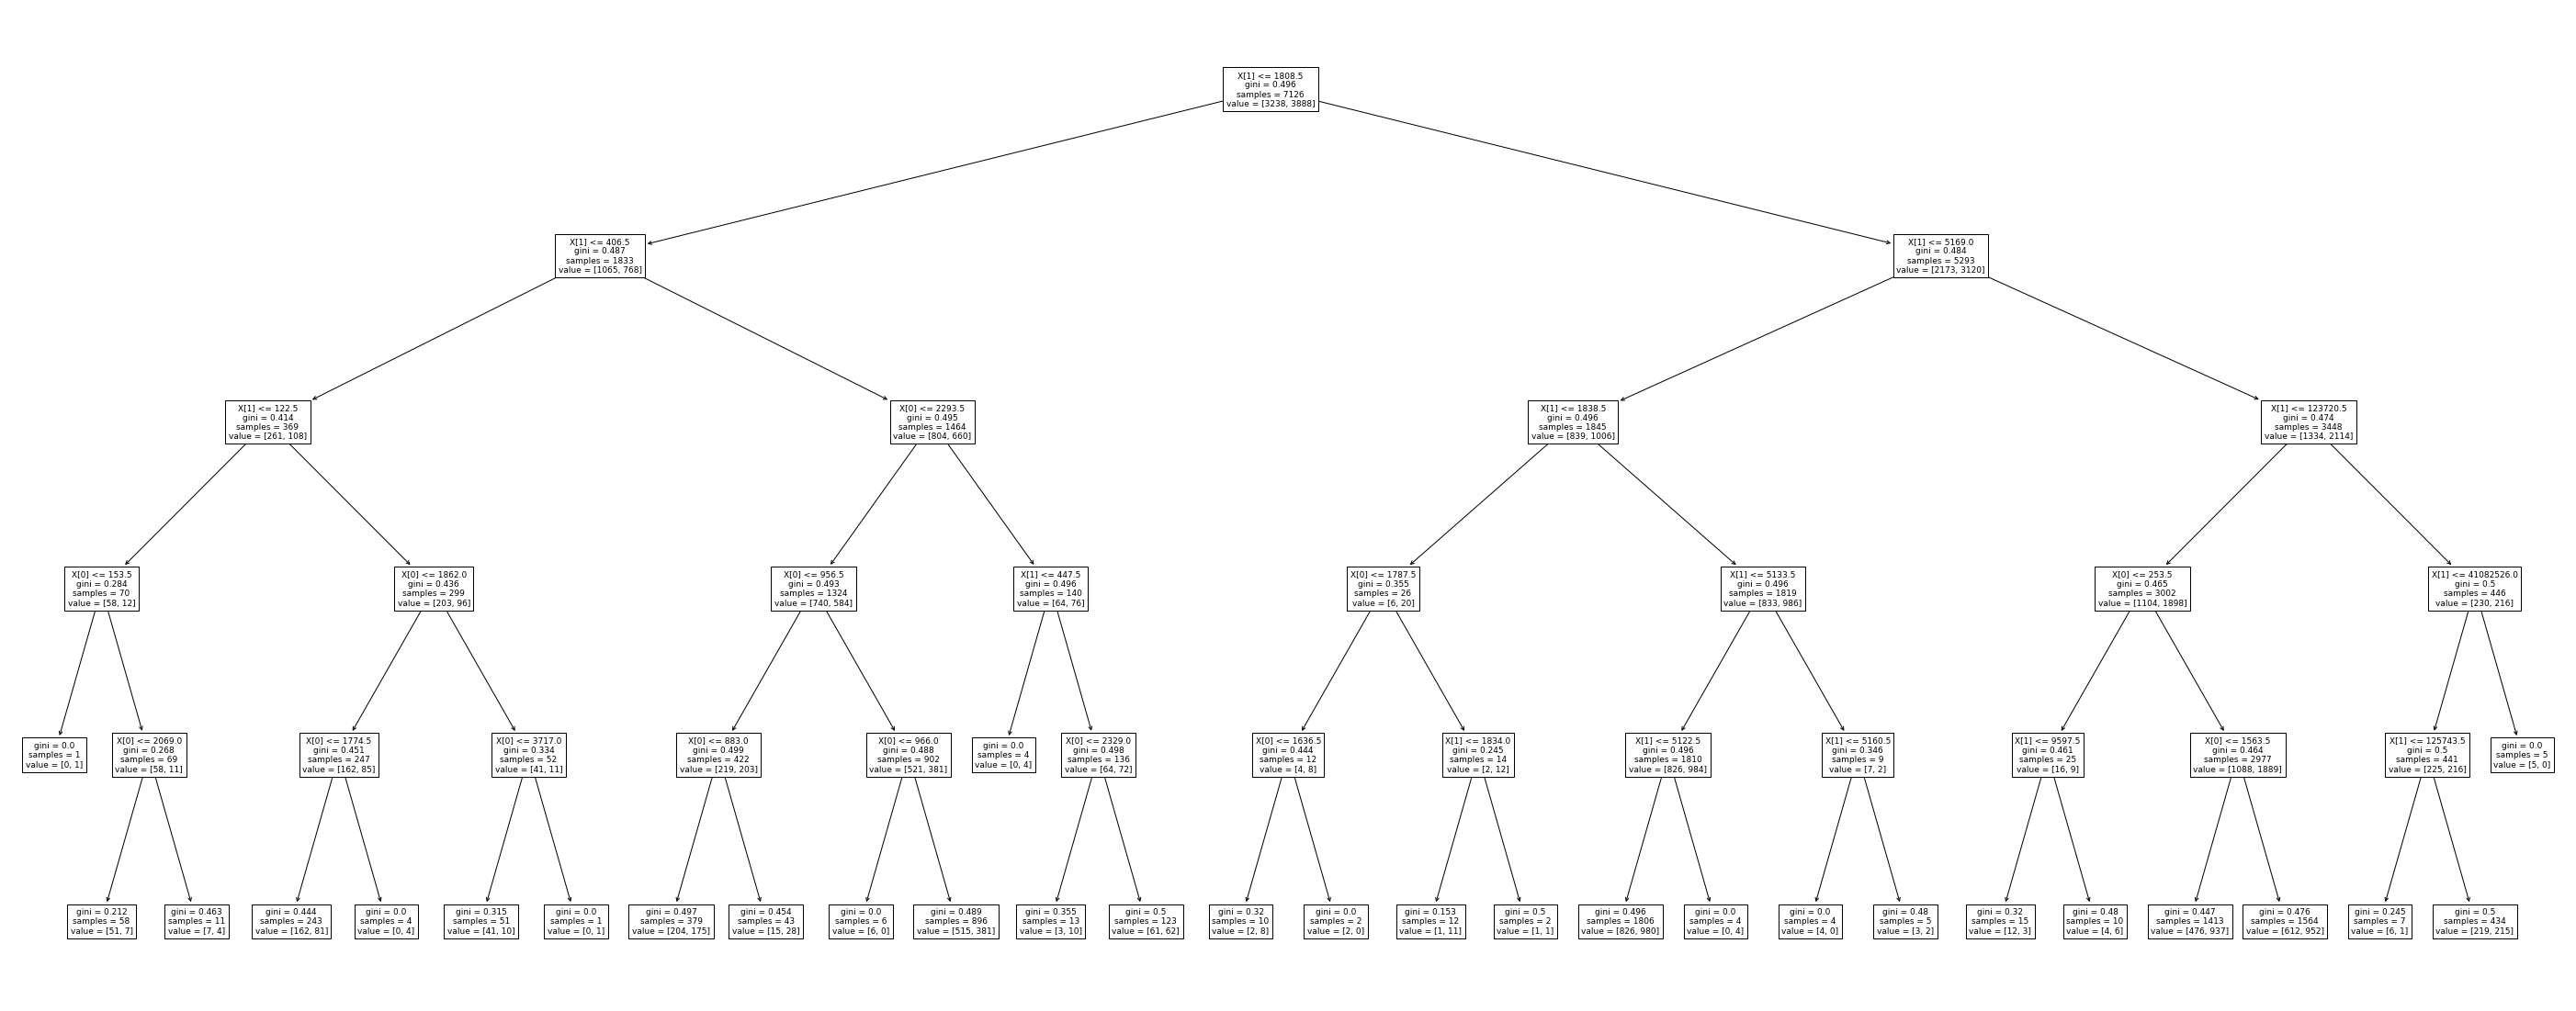

In [43]:
from matplotlib import pyplot
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART)

In [44]:
clasif_CART.score(atributos, objetivo)

0.595846197024979

In [45]:
clasif_CART_Relacional = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART_Relacional.fit(atributos_relacional, objetivo_relacional)

DecisionTreeClassifier(max_depth=5, random_state=54321)

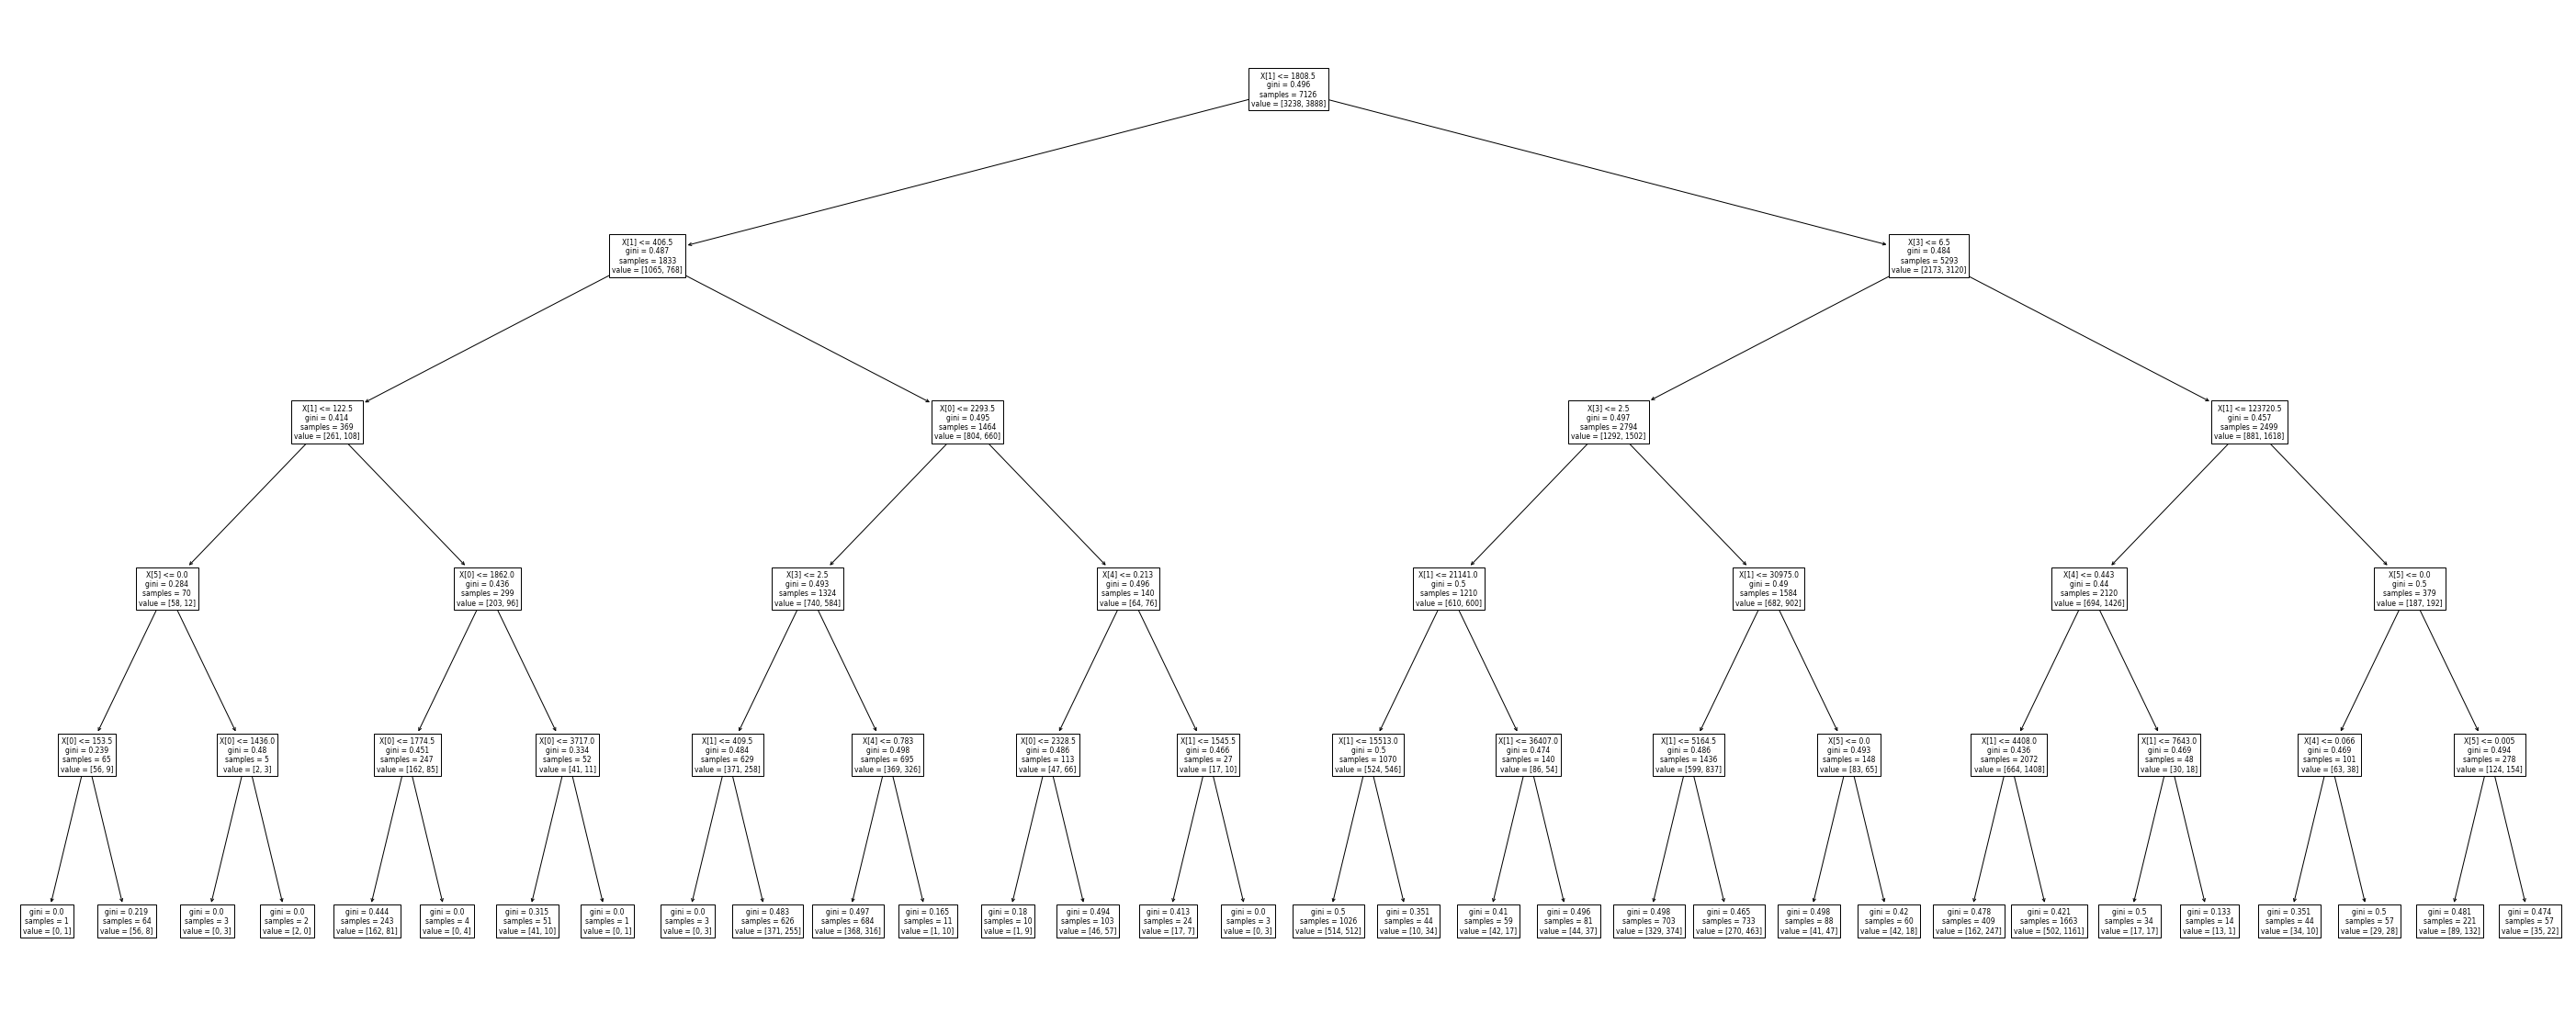

In [46]:
from matplotlib import pyplot
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART_Relacional)

In [47]:
clasif_CART_Relacional.score(atributos_relacional, objetivo_relacional)

0.6084760033679484

En este caso los atributos relacionales mejoran la tasa de acierto

### - MODELO DE CLASIFICACIÓN _Redes Neuronales_

In [49]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import get_logger
get_logger().setLevel('ERROR')

In [50]:
from tensorflow import random as tensorflow_random

tensorflow_random.set_seed(394867)

In [51]:
from sklearn import model_selection

numpy.random.seed(43958734)
numpy.set_printoptions(threshold=10)

In [52]:
from tensorflow import keras

In [53]:
atributos_numpy = atributos.to_numpy()*1
print(atributos)
print(atributos_numpy)

      days  views  partner
0     1459   9528        0
1     1629   3615        0
2      411  46546        0
3      953   5863        0
4      741   5594        0
...    ...    ...      ...
7121  2624   3174        0
7122  2035   3158        0
7123  1418   3839        0
7124  2046   6208        0
7125  1797   3545        0

[7126 rows x 3 columns]
[[ 1459  9528     0]
 [ 1629  3615     0]
 [  411 46546     0]
 ...
 [ 1418  3839     0]
 [ 2046  6208     0]
 [ 1797  3545     0]]


In [54]:
objetivo_numpy = objetivo.to_numpy().astype(float)
print(objetivo)
print(objetivo_numpy)

0       False
1        True
2        True
3        True
4        True
        ...  
7121    False
7122     True
7123     True
7124     True
7125    False
Name: mature, Length: 7126, dtype: bool
[0. 1. 1. ... 1. 1. 0.]


In [55]:
#normalizador.adapt(atributos_numpy)

In [56]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
    atributos_numpy, objetivo_numpy, test_size=.25)

In [57]:
red_twitch = keras.Sequential()

red_twitch.add(keras.Input(shape=(3,)))
#red_twitch.add(keras.layers.Dense(1))
red_twitch.add(keras.layers.Dense(1, activation='softmax'))
#red_twitch.add(keras.layers.Dense(60, input_dim=(174), activation='relu'))
#función de activación (por defecto, la identidad), Dense(2, activation='softmax')


In [58]:
red_twitch.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.17559743],
        [1.083701  ],
        [0.43011189]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [59]:
#red_twitch.compile(optimizer='SGD', loss='mean_squared_error')
red_twitch.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
red_twitch.fit(atributos_entrenamiento, objetivo_entrenamiento,
                batch_size=256, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 59227596.0000 - accuracy: 0.5496
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 169295024.0000 - accuracy: 0.5496
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 97594864.0000 - accuracy: 0.5496
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 181270128.0000 - accuracy: 0.5496
Epoch 5/10
21/21 [==============================] - 0s 898us/step - loss: 242342192.0000 - accuracy: 0.5496
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 201286224.0000 - accuracy: 0.5496
Epoch 7/10
21/21 [==============================] - 0s 997us/step - loss: 214826512.0000 - accuracy: 0.5496
Epoch 8/10
21/21 [==============================] - 0s 948us/step - loss: 124242912.0000 - accuracy: 0.5496
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 35467816.0000 - accuracy: 0.5496
Epoch 10/10
21/21 [========================

In [61]:
atributos_relacional_numpy = atributos_relacional.to_numpy()*1
print(atributos_relacional)
print(atributos_relacional_numpy)

      days  views  partner  modularity  clustering  bcentrality
0     1459   9528        0           7    0.142857     0.000434
1     1629   3615        0          19    0.093567     0.000828
2      411  46546        0           9    0.055556     0.000044
3      953   5863        0           3    0.000000     0.000004
4      741   5594        0           2    0.000000     0.000030
...    ...    ...      ...         ...         ...          ...
7121  2624   3174        0           4    0.333333     0.000010
7122  2035   3158        0           5    0.100000     0.000046
7123  1418   3839        0           3    0.000000     0.000004
7124  2046   6208        0          20    0.110526     0.000247
7125  1797   3545        0           2    0.000000     0.000002

[7126 rows x 6 columns]
[[1.45900000e+03 9.52800000e+03 0.00000000e+00 7.00000000e+00
  1.42857143e-01 4.33857035e-04]
 [1.62900000e+03 3.61500000e+03 0.00000000e+00 1.90000000e+01
  9.35672515e-02 8.27804496e-04]
 [4.11000000e+02 

In [62]:
objetivo_relacional_numpy = objetivo_relacional.to_numpy().astype(float)
print(objetivo_relacional)
print(objetivo_relacional_numpy)

0       False
1        True
2        True
3        True
4        True
        ...  
7121    False
7122     True
7123     True
7124     True
7125    False
Name: mature, Length: 7126, dtype: bool
[0. 1. 1. ... 1. 1. 0.]


In [63]:
(atributos_relacional_entrenamiento, atributos_relacional_prueba,
 objetivo_relacional_entrenamiento, objetivo_relacional_prueba) = model_selection.train_test_split(
    atributos_relacional_numpy, objetivo_relacional_numpy, test_size=.25)

In [64]:
red_twitch = keras.Sequential()

red_twitch.add(keras.Input(shape=(6,)))
#red_twitch.add(keras.layers.Dense(1))
red_twitch.add(keras.layers.Dense(1, activation='relu'))
#red_twitch.add(keras.layers.Dense(60, input_dim=(174), activation='relu'))
#función de activación (por defecto, la identidad), Dense(2, activation='softmax')


In [65]:
#red_twitch.compile(optimizer='SGD', loss='mean_squared_error')
red_twitch.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
red_twitch.fit(atributos_relacional_entrenamiento, objetivo_relacional_entrenamiento,
                batch_size=256, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 898us/step - loss: 8.4803 - accuracy: 0.4502
Epoch 2/10
21/21 [==============================] - 0s 850us/step - loss: 8.4803 - accuracy: 0.4502
Epoch 3/10
21/21 [==============================] - 0s 898us/step - loss: 8.4803 - accuracy: 0.4502
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
Epoch 5/10
21/21 [==============================] - 0s 947us/step - loss: 8.4803 - accuracy: 0.4502
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
Epoch 8/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
Epoch 10/10
21/21 [==============================] - 0s 1ms/step - loss: 8.4803 - accuracy: 0.4502
